In [1]:
## PCA

# Factorization algorithms are useful for data-driven decomposition 
# of spatial and temporal data, for example, to recover spatial patterns 
# with similar temporal profiles. Here, we show how to use some of the factorization
# algorithms in Thunder and visualize the results.

# We start by performing PCA (principal component analysis), which 
# finds patterns that capture most of the variance in the data. First 
# load toy example data, and cache it to speed up repeated queries.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

/Users/greg/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/greg/Dropbox/Jupyter/SONG_highSNR.tif')

In [65]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [66]:
data.dtype

'uint16'

In [67]:
sub = data.subsample([2,2,1])

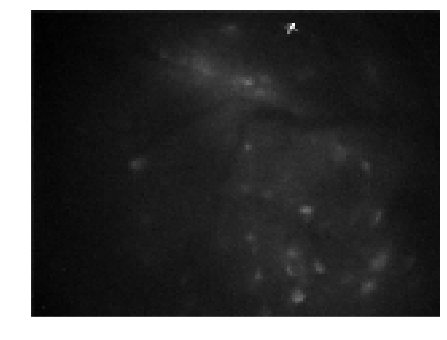

In [9]:
data = sub


In [10]:
data.cache()
data.count();

In [18]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

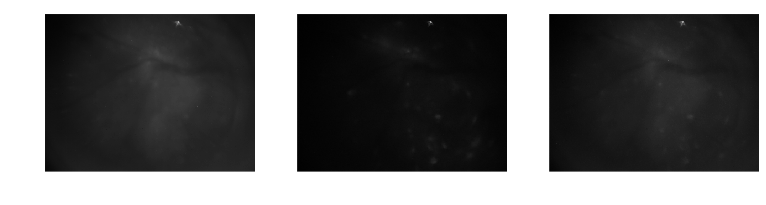

In [68]:
# look at the mean image
im = data.mean()


ax1 = plt.subplot(131)
im = data.mean()
image(im[:])
plt.subplot(132)
img = sub.stdev()
image(img[:])
plt.subplot(133)
img = sub.max()
image(img[:])


In [69]:
ts = data.toTimeSeries()

In [70]:
# Run PCA with three components

from thunder import PCA
model = PCA(k=4).fit(ts)

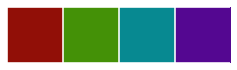

In [92]:
c = sns.hls_palette(4, s=0.9, l=0.3)
sns.palplot(c)



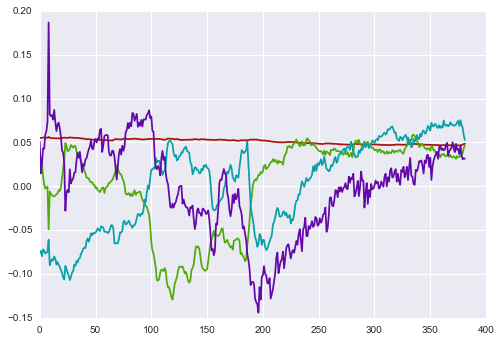

In [114]:
c = sns.hls_palette(4, s=0.9, l=0.35)
sns.set_palette(c)
plt.plot(model.comps.T);


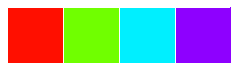

In [113]:
sns.palplot(current_palette)

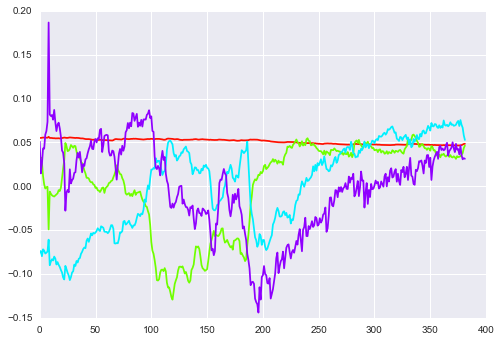

In [112]:
sns.set_context('notebook')

sns.palplot(current_palette)
sns.set_palette(current_palette)
plt.plot(model.comps.T);

In [23]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one.

imgs = model.scores.pack()
imgs.shape

(4, 114, 152)

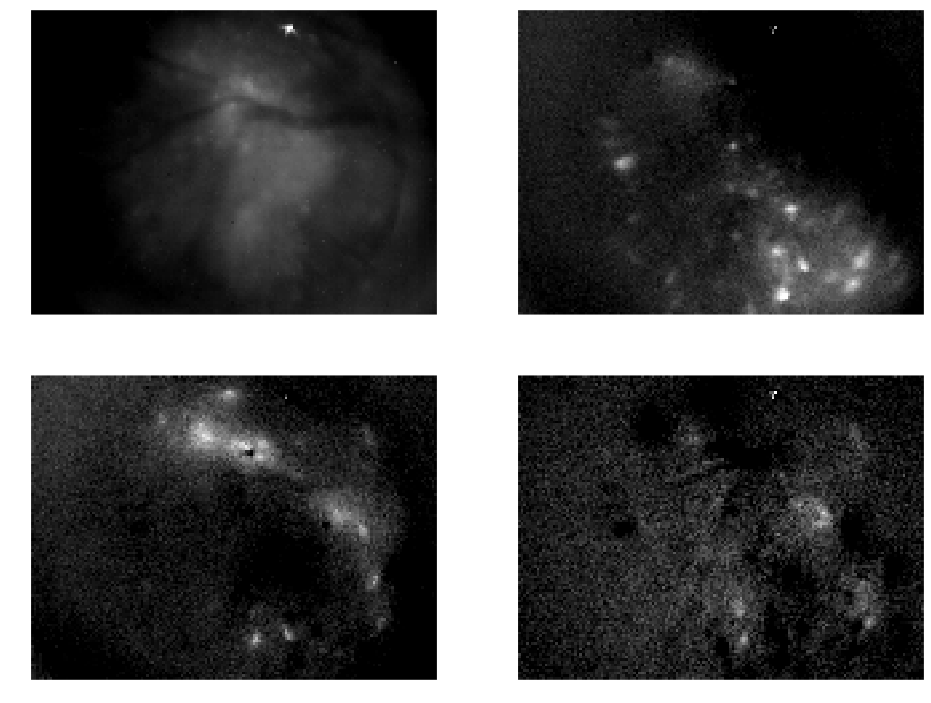

In [32]:
CX = (-0.005,0.05)

ax1 = plt.subplot(221)
image(imgs[0,:,:], clim=CX)
ax1 = plt.subplot(222)
image(imgs[1,:,:], clim=CX)
ax1 = plt.subplot(223)
image(imgs[2,:,:], clim=CX)
ax1 = plt.subplot(224)
image(imgs[3,:,:], clim=CX)

In [33]:
# take the last 3 PCs, since the first one dosn't look to informative...
gg = model.comps[1:,:]
gg.shape

(3, 382)

In [34]:
imgs = model.scores.pack()
imgs2 = imgs[1:,:,:] # first 3
imgs3 = imgs[:3,:,:]  # Last 3
imgs2.shape

(3, 114, 152)

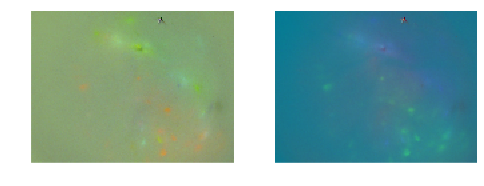

In [44]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=.8).transform(imgs2)
ax1 = plt.subplot(121)
image(maps,2)


maps = Colorize(cmap='rgb', scale=.7).transform(imgs3)
ax1 = plt.subplot(122)
image(maps,2)

In [39]:
imgs3 = imgs[:3,:,:]
imgs3.shape



(3, 114, 152)

In [42]:
# So maybe it is better to normalize the data:
ts2 = data.toTimeSeries().normalize()

In [43]:
# Run PCA with three components

from thunder import PCA
model2 = PCA(k=4).fit(ts2)

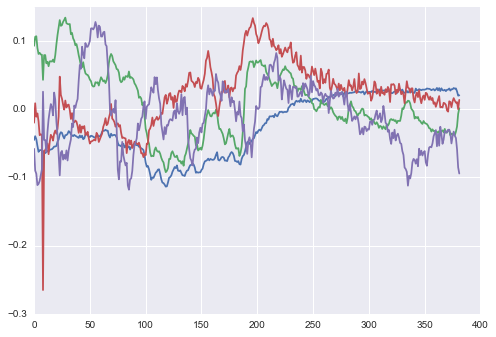

In [46]:
plt.plot(model2.comps.T);

In [50]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one, just like we did before...

imgs = model2.scores.pack()
imgs.shape

(4, 114, 152)

In [51]:
# Lets seperate into the first an last three basis functions:
imgs2 = imgs[1:,:,:] # first 3
imgs3 = imgs[:3,:,:]  # Last 3
imgs2.shape

(3, 114, 152)

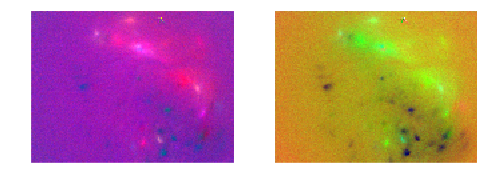

In [53]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=1.2).transform(imgs2)
ax1 = plt.subplot(121)
image(maps,2)


maps = Colorize(cmap='rgb', scale=1.2).transform(imgs3)
ax1 = plt.subplot(122)
image(maps,2)

In [55]:
pts = model.scores.subset(500, thresh=0.01, stat='norm')


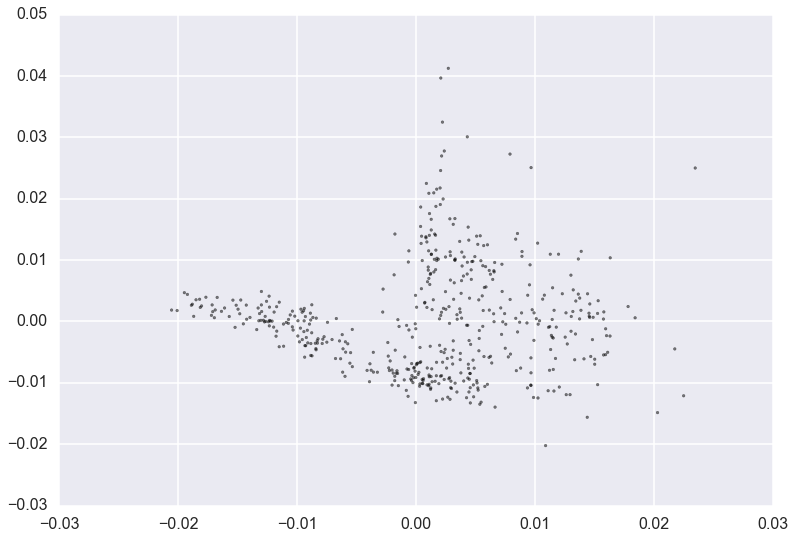

In [56]:
from numpy import newaxis, squeeze
sns.set_context('poster')


clrs = Colorize(cmap='polar', scale=.1).transform([pts[:,0][:,newaxis], pts[:,1][:,newaxis]]).squeeze()
plt.scatter(pts[:,0],pts[:,1], c=clrs, s=7, alpha=0.5);

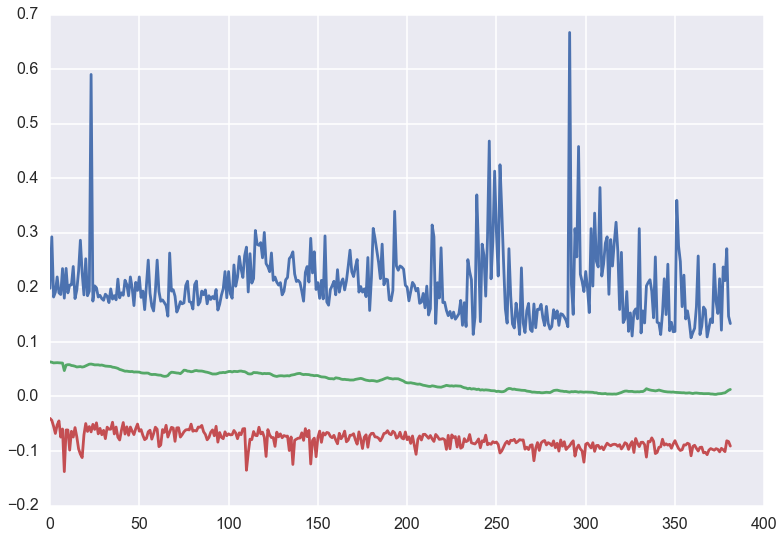

In [57]:
## Take a subset of pixels, and plot them 
plt.plot(ts.normalize().max());
plt.plot(ts.normalize().mean());
plt.plot(ts.normalize().min());

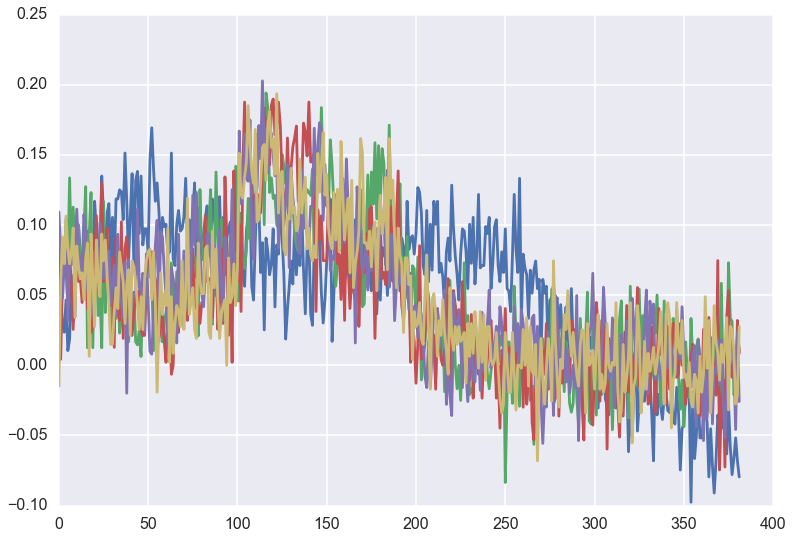

In [63]:
## Take a subset of pixels, and plot them 
# ts is the timsereis, we defiend earlier
examples = ts2.subset(nsamples=5, thresh=.05)
plt.plot(examples.T); #  [0:20,:]);